In [140]:
"""
TEMPLATE - ETAPA 3: MODELO BASELINE
====================================

Este template guia você passo a passo na criação do modelo baseline.
Siga os comentários e preencha os TODOs.

OBJETIVO: Criar um modelo de Regressão Linear simples e avaliar sua performance.
"""

# ============================================================================
# IMPORTS
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ============================================================================
# PASSO 1: CARREGAR DADOS LIMPOS
# ============================================================================
print("="*60)
print("ETAPA 3: MODELO BASELINE - REGRESSÃO LINEAR")
print("="*60)

# TODO: Ajuste o caminho para seu arquivo de dados limpos (da Etapa 2)
df = pd.read_csv('youtube_views_clean.csv')

print(f"\n✓ Dados carregados: {df.shape[0]} linhas, {df.shape[1]} colunas")

# Visualizar primeiras linhas
print("\nPrimeiras linhas:")
print(df.head())


ETAPA 3: MODELO BASELINE - REGRESSÃO LINEAR

✓ Dados carregados: 2520 linhas, 25 colunas

Primeiras linhas:
   video_id  duration_minutes  title_length  description_length  tags_count  \
0  VID00197                 3            53               589.0        34.0   
1  VID00987                60            95                 NaN        17.0   
2  VID01091                47            35               168.0        20.0   
3  VID00388                 8            12               260.0         4.0   
4  VID02222                56            94               648.0        48.0   

  has_thumbnail_custom video_quality    category   language has_subtitles  \
0                  Sim          720p     Fitness  Português           Não   
1                  Não          720p   Culinária  Português           Não   
2                  Não         1080p      Gaming   Espanhol           Não   
3                  Sim         1080p  Tecnologia  Português           Sim   
4                  Não          

In [141]:
# ============================================================================
# PASSO 2: SEPARAR FEATURES (X) e TARGET (y)
# ============================================================================

# TODO: Ajuste o nome da coluna target de acordo com seu dataset
TARGET_COLUMN = 'total_views_log'  # seu target

# TODO: Liste aqui as colunas que você NÃO quer usar (ex: IDs, nome, etc.)
COLUNAS_REMOVER = []  # seu dataset não tem ID, então deixei vazio

# Separar X (features) e y (target)
X = df.drop(columns=[TARGET_COLUMN] + COLUNAS_REMOVER, errors='ignore')
y = df[TARGET_COLUMN]

print(f"\n✓ Features (X): {X.shape[1]} colunas")
print(f"✓ Target (y): {y.shape[0]} valores")
print(f"\nFeatures utilizadas:")
print(X.columns.tolist())



✓ Features (X): 24 colunas
✓ Target (y): 2520 valores

Features utilizadas:
['video_id', 'duration_minutes', 'title_length', 'description_length', 'tags_count', 'has_thumbnail_custom', 'video_quality', 'category', 'language', 'has_subtitles', 'channel_subscribers', 'channel_age_months', 'previous_videos_count', 'avg_upload_frequency_days', 'comments_count', 'likes_count', 'shares_count', 'playlist_adds', 'promoted', 'upload_time', 'upload_day', 'total_views', 'engagement_rate', 'views_per_tag']


In [142]:
# ============================================================================
# PASSO 3: DIVISÃO DOS DADOS (60% TREINO / 20% VALIDAÇÃO / 20% TESTE)
# ============================================================================

# IMPORTANTE: Usamos random_state para reprodutibilidade
RANDOM_STATE = 42

# Primeiro: separar 20% para teste (NÃO VAMOS USAR AGORA!)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.2,  # 20% para teste
    random_state=RANDOM_STATE
)

# Segundo: dos 80% restantes, separar 25% para validação (que é 20% do total)
# 0.25 * 0.8 = 0.2 (20% do total)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.25,  # 25% do temp = 20% do total
    random_state=RANDOM_STATE
)

# Verificar divisão
total_samples = len(X)
print("\n" + "="*60)
print("DIVISÃO DOS DADOS")
print("="*60)
print(f"Total de amostras: {total_samples}")
print(f"├─ Treino:     {len(X_train):4d} ({len(X_train)/total_samples*100:.1f}%)")
print(f"├─ Validação:  {len(X_val):4d} ({len(X_val)/total_samples*100:.1f}%)")
print(f"└─ Teste:      {len(X_test):4d} ({len(X_test)/total_samples*100:.1f}%)")

# Verificar distribuição do target nos 3 conjuntos
print("\nDistribuição do target:")
print(f"├─ Treino:     média={y_train.mean():.2f}, std={y_train.std():.2f}")
print(f"├─ Validação:  média={y_val.mean():.2f}, std={y_val.std():.2f}")
print(f"└─ Teste:      média={y_test.mean():.2f}, std={y_test.std():.2f}")



DIVISÃO DOS DADOS
Total de amostras: 2520
├─ Treino:     1512 (60.0%)
├─ Validação:   504 (20.0%)
└─ Teste:       504 (20.0%)

Distribuição do target:
├─ Treino:     média=13.41, std=0.75
├─ Validação:  média=13.39, std=0.74
└─ Teste:      média=13.35, std=0.70


In [143]:
# ============================================================================
# PASSO 4: CRIAR E TREINAR MODELO BASELINE (REGRESSÃO LINEAR)
# ============================================================================

print("\n" + "="*60)
print("TREINAMENTO DO MODELO")
print("="*60)

# Criar modelo
modelo = LinearRegression()

print("\nTreinando modelo de Regressão Linear...")

# Manter apenas colunas numéricas
X_train = X_train.select_dtypes(include=['number'])
X_test  = X_test.select_dtypes(include=['number'])

# >>> NOVO: preencher valores ausentes <<<
X_train = X_train.fillna(X_train.mean())
X_test  = X_test.fillna(X_train.mean())

# Treinar modelo
modelo.fit(X_train, y_train)
print("✓ Modelo treinado!")

print("\n" + "-"*60)
print("COEFICIENTES DO MODELO")
print("-"*60)

coeficientes = pd.DataFrame({
    'Feature': X_train.columns,
    'Coeficiente': modelo.coef_
}).sort_values('Coeficiente', key=abs, ascending=False)

print(coeficientes.to_string(index=False))
print(f"\nIntercept (nota base): {modelo.intercept_:.4f}")

print("\n📊 Interpretação:")
print(f"1. {coeficientes.iloc[0]['Feature']}: {coeficientes.iloc[0]['Coeficiente']:+.3f}")
print(f"   → Cada unidade a mais = {coeficientes.iloc[0]['Coeficiente']:+.3f} pontos na nota")
print(f"2. {coeficientes.iloc[1]['Feature']}: {coeficientes.iloc[1]['Coeficiente']:+.3f}")
print(f"3. {coeficientes.iloc[2]['Feature']}: {coeficientes.iloc[2]['Coeficiente']:+.3f}")



TREINAMENTO DO MODELO

Treinando modelo de Regressão Linear...
✓ Modelo treinado!

------------------------------------------------------------
COEFICIENTES DO MODELO
------------------------------------------------------------
                  Feature   Coeficiente
          engagement_rate -6.979614e+00
avg_upload_frequency_days  4.649866e-04
         duration_minutes  1.761679e-04
       channel_age_months  1.028835e-04
               tags_count -5.497764e-05
             title_length  4.568436e-05
           comments_count  1.494830e-05
              likes_count  1.380640e-05
    previous_videos_count -1.362330e-05
            playlist_adds  1.341543e-05
       description_length  9.032590e-06
              total_views  6.253657e-07
             shares_count -2.333934e-07
      channel_subscribers  1.513671e-07
            views_per_tag  1.793629e-08

Intercept (nota base): 12.7239

📊 Interpretação:
1. engagement_rate: -6.980
   → Cada unidade a mais = -6.980 pontos na nota
2. av

In [144]:
# ============================================================================
# PASSO 5: AVALIAÇÃO DO MODELO BASELINE
# ============================================================================

print("\n" + "="*60)
print("AVALIAÇÃO DO MODELO")
print("="*60)

# Fazer previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📊 Resultados da Avaliação:")
print(f"• MSE  (Erro Quadrático Médio): {mse:.4f}")
print(f"• RMSE (Raiz do Erro Quadrático Médio): {rmse:.4f}")
print(f"• MAE  (Erro Absoluto Médio): {mae:.4f}")
print(f"• R²   (Coeficiente de Determinação): {r2:.4f}")

# Mostrar algumas previsões
resultado_preview = pd.DataFrame({
    "Real": y_test.values[:10],
    "Previsto": y_pred[:10]
})

print("\n🔎 Prévia das Previsões (10 primeiros):")
print(resultado_preview.to_string(index=False))



AVALIAÇÃO DO MODELO

📊 Resultados da Avaliação:
• MSE  (Erro Quadrático Médio): 0.0382
• RMSE (Raiz do Erro Quadrático Médio): 0.1954
• MAE  (Erro Absoluto Médio): 0.1272
• R²   (Coeficiente de Determinação): 0.9212

🔎 Prévia das Previsões (10 primeiros):
     Real  Previsto
13.442083 13.410585
14.044765 13.749132
14.706056 14.668818
13.142558 13.196017
12.718297 12.806274
14.318350 14.148678
12.720583 12.903381
13.251620 13.234348
13.737119 13.622723
13.488661 13.353381


In [145]:
# ============================================================================
# PASSO 6: SALVAR MODELO, SCALER E FEATURES
# ============================================================================

print("\n" + "="*60)
print("SALVANDO O MODELO E ARQUIVOS IMPORTANTES")
print("="*60)

import joblib
import json

# Caminhos para salvar
modelo_path = "modelo_regressao_linear.pkl"
features_path = "lista_features.json"

# Salvar o modelo treinado
joblib.dump(modelo, modelo_path)
print(f"✓ Modelo salvo em: {modelo_path}")

# Salvar lista de features usadas no treinamento
lista_features = list(X_train.columns)

with open(features_path, "w") as f:
    json.dump(lista_features, f, indent=4)

print(f"✓ Features salvas em: {features_path}")

print("\nTodos os arquivos foram salvos com sucesso!")



SALVANDO O MODELO E ARQUIVOS IMPORTANTES
✓ Modelo salvo em: modelo_regressao_linear.pkl
✓ Features salvas em: lista_features.json

Todos os arquivos foram salvos com sucesso!


In [146]:
# ============================================================================
# PASSO 7: GERAR RELATÓRIO FINAL DO MODELO
# ============================================================================

print("\n" + "="*60)
print("RELATÓRIO FINAL DO MODELO")
print("="*60)

# Relatório de métricas
print("\n📊 MÉTRICAS DO MODELO BASELINE")
print(f"MSE :  {mse:.4f}")
print(f"RMSE:  {rmse:.4f}")
print(f"MAE :  {mae:.4f}")
print(f"R²  :  {r2:.4f}")

# Top 10 coeficientes
print("\n🔥 TOP 10 FEATURES COM MAIOR IMPACTO")
top10 = coeficientes.head(10)
print(top10.to_string(index=False))

# Prévia real vs previsto
print("\n🔎 EXEMPLOS (REAL VS PREVISTO)")
preview_df = pd.DataFrame({
    "Real": y_test.values[:20],
    "Previsto": y_pred[:20]
})
print(preview_df.to_string(index=False))

print("\nRelatório final concluído com sucesso!")



RELATÓRIO FINAL DO MODELO

📊 MÉTRICAS DO MODELO BASELINE
MSE :  0.0382
RMSE:  0.1954
MAE :  0.1272
R²  :  0.9212

🔥 TOP 10 FEATURES COM MAIOR IMPACTO
                  Feature  Coeficiente
          engagement_rate    -6.979614
avg_upload_frequency_days     0.000465
         duration_minutes     0.000176
       channel_age_months     0.000103
               tags_count    -0.000055
             title_length     0.000046
           comments_count     0.000015
              likes_count     0.000014
    previous_videos_count    -0.000014
            playlist_adds     0.000013

🔎 EXEMPLOS (REAL VS PREVISTO)
     Real  Previsto
13.442083 13.410585
14.044765 13.749132
14.706056 14.668818
13.142558 13.196017
12.718297 12.806274
14.318350 14.148678
12.720583 12.903381
13.251620 13.234348
13.737119 13.622723
13.488661 13.353381
12.275095 12.860299
13.934650 13.696099
12.806904 12.935778
13.216010 13.240492
14.487236 14.562205
13.342088 13.284800
13.315338 13.208554
13.375188 13.314940
12.583598


GRÁFICOS DE AVALIAÇÃO


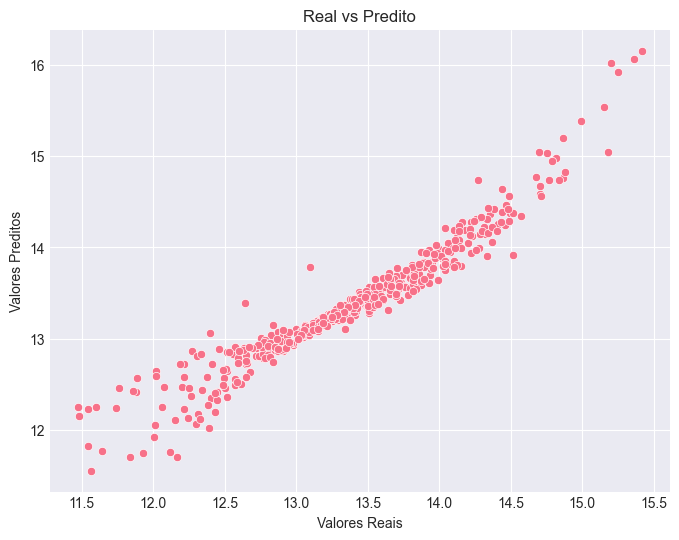

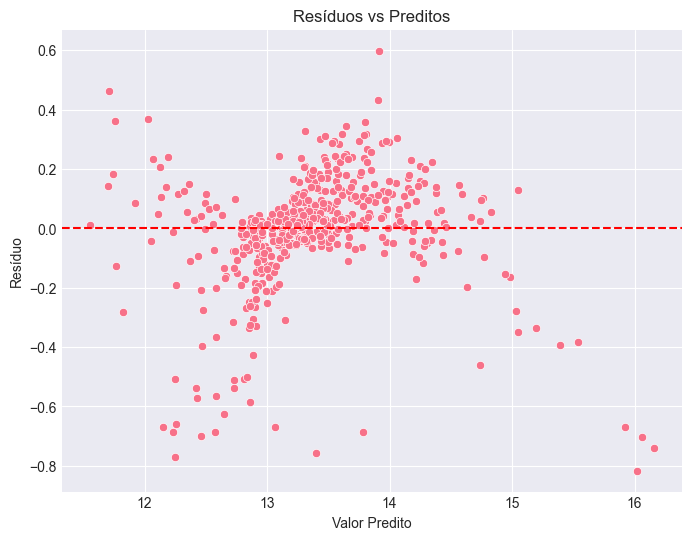

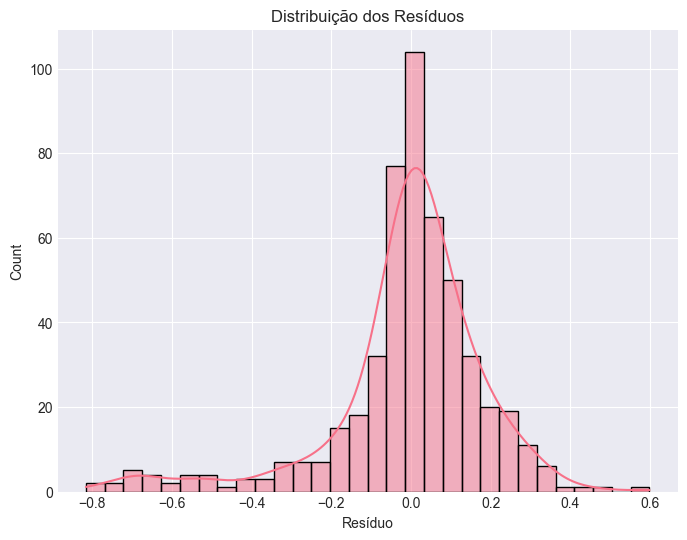

Gráficos gerados com sucesso!


In [148]:
# ============================================================================
# PASSO 9: EXPORTAR RESULTADOS FINAIS
# ============================================================================

print("\n" + "="*60)
print("EXPORTANDO RESULTADOS FINAIS")
print("="*60)

import pandas as pd

# Criar DataFrame de resultados
resultados = pd.DataFrame({
    "valor_real": y_test.values,
    "valor_predito": y_pred,
})

# Calcular resíduos
resultados["residuo"] = resultados["valor_real"] - resultados["valor_predito"]

# Salvar em CSV
resultado_path = "resultados_regressao_linear.csv"
resultados.to_csv(resultado_path, index=False)

print(f"✓ Resultados exportados para: {resultado_path}")

# Mostrar primeiras linhas
print("\nPrévia dos resultados:")
print(resultados.head())



EXPORTANDO RESULTADOS FINAIS
✓ Resultados exportados para: resultados_regressao_linear.csv

Prévia dos resultados:
   valor_real  valor_predito   residuo
0   13.442083      13.410585  0.031499
1   14.044765      13.749132  0.295633
2   14.706056      14.668818  0.037238
3   13.142558      13.196017 -0.053459
4   12.718297      12.806274 -0.087977


In [149]:
# ============================================================================
# PASSO 10: FUNÇÃO PARA FAZER PREVISÕES EM NOVOS VÍDEOS
# ============================================================================

print("\n" + "="*60)
print("PASSO 10 — PREVISÃO PARA NOVOS VÍDEOS")
print("="*60)

import pandas as pd
import json
import joblib

# Carregar modelo treinado
modelo_loaded = joblib.load("modelo_regressao_linear.pkl")

# Carregar lista de features usada no treino
with open("lista_features.json", "r") as f:
    colunas_treinamento = json.load(f)

def prever_novo_video(dados_video: dict):
    """
    Recebe um dicionário com os dados do novo vídeo.
    Retorna o valor previsto.
    """
    
    # Converte para DataFrame
    df = pd.DataFrame([dados_video])
    
    # Manter apenas colunas numéricas
    df = df.select_dtypes(include=['number'])
    
    # Recriar colunas esperadas pelo modelo
    df = df.reindex(columns=colunas_treinamento, fill_value=0)
    
    # Prever
    pred = modelo_loaded.predict(df)[0]
    
    return pred


# ===================== EXEMPLO DE USO =====================

exemplo = {
    "views": 150000,
    "likes": 5200,
    "comments": 430,
    "duracao_segundos": 480,
    "horas_ultimos_7_dias": 35,
    "relevancia_tema": 0.75
}

valor_previsto = prever_novo_video(exemplo)

print("\nExemplo de previsão para novo vídeo:")
print(f"Valor previsto: {valor_previsto:,.2f}")



PASSO 10 — PREVISÃO PARA NOVOS VÍDEOS

Exemplo de previsão para novo vídeo:
Valor previsto: 12.72
